In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

In [266]:
data = pd.read_csv('data/kobe.csv')

In [267]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [268]:
target = 'shot_made_flag'

**Задания:**

1. Провести анализ данных. Много хороших примеров анализа можно посмотреть здесь https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels
2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.
3. Обучить линейную модель, Lasso, Ridge на тех же признаках - построить сравнительную таблицу коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. Посчитать RSS

**Дополнительно**
4. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC
5. Построить PCA на подготовленных признаках, посмотреть, какие компоненты составляют наибольшую часть дисперсии целевой переменной

In [269]:
data.columns
# 'action_type', 'combined_shot_type', 'game_event_id',      'game_id',           'lat',
# 'loc_x',       'loc_y',              'lon',                'minutes_remaining', 'period',    
# 'playoffs',    'season',             'seconds_remaining',  'shot_distance',     'shot_made_flag',
# 'shot_type',   'shot_zone_area',     'shot_zone_basic',    'shot_zone_range',   'team_id',  
# 'team_name',   'game_date',          'matchup',            'opponent',          'shot_id'

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [271]:
data.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [272]:
dt = data.copy()
dt.shape

(30697, 25)

In [273]:
# принял решение избавиться от строк с NaN для целеой переменной, 
# т.к. если их заменить случайным образом на 0 или 1 - можно внести шумы, кторые снизят качество получаемых результатов
dt = dt[~(dt.shot_made_flag.isna())]
dt.shape

(25697, 25)

In [274]:
data_corr = dt.corr()
data_corr

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
game_event_id,1.000000,-0.005982,-0.059602,-0.029954,0.059602,-0.029954,-0.274276,0.955914,-0.007963,-0.018670,0.063295,-0.037232,NaN,0.025433
game_id,-0.005982,1.000000,0.011361,-0.012944,-0.011361,-0.012944,0.009581,0.005061,0.917898,-0.009029,-0.027247,-0.001612,NaN,0.761232
lat,-0.059602,0.011361,1.000000,0.017578,-1.000000,0.017578,0.077399,-0.039737,-0.000857,0.057766,-0.818124,0.148070,NaN,-0.033476
loc_x,-0.029954,-0.012944,0.017578,1.000000,-0.017578,1.000000,0.006624,-0.030059,-0.007751,0.001512,0.022307,-0.000848,NaN,-0.012453
loc_y,0.059602,-0.011361,-1.000000,-0.017578,1.000000,-0.017578,-0.077399,0.039737,0.000857,-0.057766,0.818124,-0.148070,NaN,0.033476
lon,-0.029954,-0.012944,0.017578,1.000000,-0.017578,1.000000,0.006624,-0.030059,-0.007751,0.001512,0.022307,-0.000848,NaN,-0.012453
minutes_remaining,-0.274276,0.009581,0.077399,0.006624,-0.077399,0.006624,1.000000,-0.047021,0.009583,0.024232,-0.064159,0.028342,NaN,-0.008251
period,0.955914,0.005061,-0.039737,-0.030059,0.039737,-0.030059,-0.047021,1.000000,0.003905,0.007153,0.047311,-0.032152,NaN,-0.003357
playoffs,-0.007963,0.917898,-0.000857,-0.007751,0.000857,-0.007751,0.009583,0.003905,1.000000,-0.005951,-0.007751,-0.001257,NaN,0.612991
seconds_remaining,-0.018670,-0.009029,0.057766,0.001512,-0.057766,0.001512,0.024232,0.007153,-0.005951,1.000000,-0.055875,0.030804,NaN,-0.004833


In [275]:
useless_columns = ['lat','lon','team_name','matchup']
data_redused = dt.drop(useless_columns,axis =1)

In [276]:
data_redused.shape

(25697, 21)

In [277]:
data_redused.head()

,action_type,combined_shot_type,game_event_id,game_id,loc_x,loc_y,minutes_remaining,period,playoffs,season,...,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,game_date,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,-157,0,10,1,0,2000-01,...,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,2000-10-31,POR,2
2,Jump Shot,Jump Shot,35,20000012,-101,135,7,1,0,2000-01,...,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,2000-10-31,POR,3
3,Jump Shot,Jump Shot,43,20000012,138,175,6,1,0,2000-01,...,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,2000-10-31,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,0,0,6,2,0,2000-01,...,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,2000-10-31,POR,5
5,Jump Shot,Jump Shot,244,20000012,-145,-11,9,3,0,2000-01,...,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,2000-10-31,POR,6


In [278]:
print('Total  number  of  columns  =',len(data_redused.columns))
cat_data = data_redused[['action_type','combined_shot_type','season','shot_type','shot_zone_area',
                 'shot_zone_basic','shot_zone_range','game_date','opponent']]
print('Columns of categorical type =',len(cat_data.columns))

dig_data = data_redused[['game_event_id','game_id','loc_x','loc_y','minutes_remaining','period',
                 'playoffs','seconds_remaining','shot_distance','shot_made_flag','team_id','shot_id']]
print('Columns of     digital type =',len(dig_data.columns))

Total  number  of  columns  = 21
Columns of categorical type = 9
Columns of     digital type = 12


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f586dceae80>,
      dtype=object)

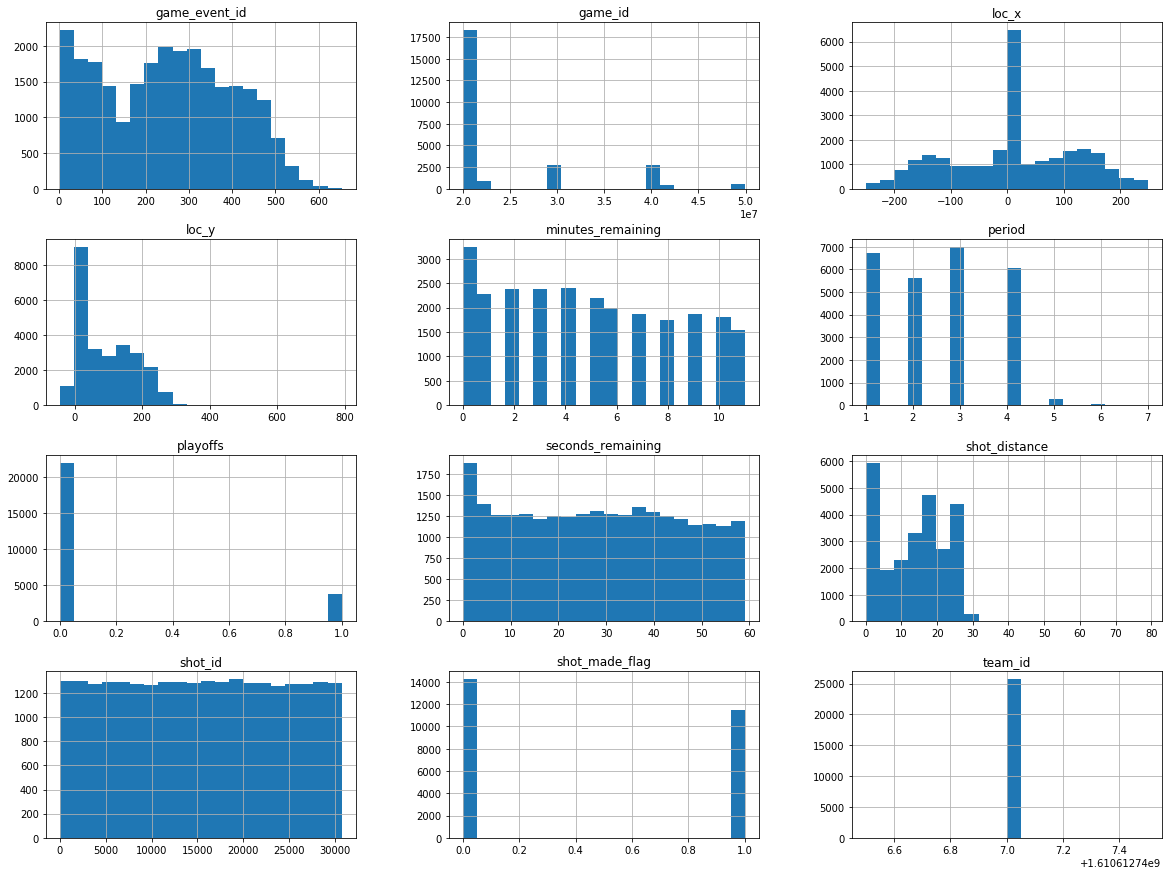

In [279]:
data_redused.hist(bins = 20, figsize=(20,15))

In [280]:
len(data_redused.shot_id.unique())

25697

In [281]:
useless_columns = 'shot_id'
data_redused = data_redused.drop(useless_columns,axis =1)
data_redused.shape

(25697, 20)

In [282]:
print('Total  number  of  columns  =',len(data_redused.columns))
cat_data = data_redused[['action_type','combined_shot_type','season','shot_type','shot_zone_area',
                 'shot_zone_basic','shot_zone_range','game_date','opponent']]
print('Columns of categorical type =',len(cat_data.columns))

dig_data = data_redused[['game_event_id','game_id','loc_x','loc_y','minutes_remaining','period',
                 'playoffs','seconds_remaining','shot_distance','shot_made_flag','team_id']]
print('Columns of     digital type =',len(dig_data.columns))

Total  number  of  columns  = 20
Columns of categorical type = 9
Columns of     digital type = 11


In [283]:
dig_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 11 columns):
game_event_id        25697 non-null int64
game_id              25697 non-null int64
loc_x                25697 non-null int64
loc_y                25697 non-null int64
minutes_remaining    25697 non-null int64
period               25697 non-null int64
playoffs             25697 non-null int64
seconds_remaining    25697 non-null int64
shot_distance        25697 non-null int64
shot_made_flag       25697 non-null float64
team_id              25697 non-null int64
dtypes: float64(1), int64(10)
memory usage: 2.4 MB


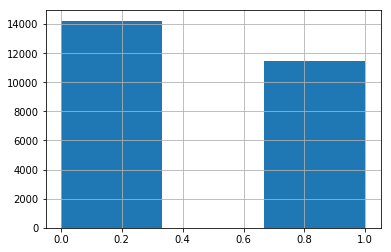

In [284]:
dig_data.shot_made_flag.hist(bins = 3)

In [285]:
shooting_data = cat_data[[col for col in cat_data.columns if 'shot' in col]].copy()

shooting_data['action_type']= data['action_type']
shooting_data.head()

,combined_shot_type,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,action_type
1,Jump Shot,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,Jump Shot
2,Jump Shot,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,Jump Shot
3,Jump Shot,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,Jump Shot
4,Dunk,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Driving Dunk Shot
5,Jump Shot,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,Jump Shot


In [286]:
combined_shot_type = shooting_data.combined_shot_type.value_counts()
len(combined_shot_type)

6

In [287]:
shot_type = shooting_data.shot_type.value_counts()  
len(shot_type)

2

In [288]:
shooting_data.shot_zone_area.value_counts()        

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64

In [289]:
shot_zone_basic = shooting_data.shot_zone_basic.value_counts() 
len(shot_zone_basic)

7

In [290]:
shot_zone_range = shooting_data.shot_zone_range.value_counts()
len(shot_zone_range)

5

In [291]:
action_type = shooting_data.action_type.value_counts()
len(action_type)

55

In [292]:
cat_data_others = cat_data[[col for col in cat_data.columns if 'shot' not in col]].drop('action_type',axis = 1)  
#cat_data_others = cat_data_others.drop('matchup',axis = 1)
cat_data_others.head()

,season,game_date,opponent
1,2000-01,2000-10-31,POR
2,2000-01,2000-10-31,POR
3,2000-01,2000-10-31,POR
4,2000-01,2000-10-31,POR
5,2000-01,2000-10-31,POR


In [293]:
seasons = cat_data_others.season.value_counts() 
len(seasons)

20

In [294]:
game_date = cat_data_others.game_date.value_counts()
len(game_date)

1558

In [295]:
opponent = cat_data_others.opponent.value_counts()
len(opponent)

33

In [296]:
def get_one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(cols, axis =1)
    return df

In [297]:
print('all data = ',cat_data.columns)
print('\nother cat data =', cat_data_others.columns)

all data =  Index(['action_type', 'combined_shot_type', 'season', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_date',
       'opponent'],
      dtype='object')

other cat data = Index(['season', 'game_date', 'opponent'], dtype='object')


In [298]:
one_hot = ['combined_shot_type', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range']
counts  = ['season', 'game_date', 'opponent','action_type']
woe     = ['season', 'game_date', 'opponent','action_type']
shooting_data.shape
#shooting_data = get_one_hot(shooting_data,one_hot)

(25697, 6)

In [299]:
shooting_data_heated = get_one_hot(shooting_data,one_hot)
shooting_data_heated.shape

KeyError: 'shot_type'

In [ ]:
shooting_data_heated_droped =  shooting_data_heated.drop(one_hot,axis = 1)
shooting_data_heated_droped.head()

In [300]:
def get_counts_train(df_train, col, target_col):
    for el in col:
        category_val_dict = (
            df_train[df_train[target_col] == 1][el].value_counts()
            /
            df_train[el].value_counts()
        ).to_dict()
        df_train[el + '_counts'] = df_train[el].apply(category_val_dict.get)
    return df_train

In [255]:
def get_counts_test(df_train, df_test, col, target_col):
    for el in col:
        category_val_dict = (
            df_train[df_train[target_col] == 1][el].value_counts()
            /
            df_train[el].value_counts()
        ).to_dict()
        df_test[el + '_counts'] = df_test[el].apply(category_val_dict.get)
    return df_test

In [256]:
def get_woe_train(df_train, col, target_col):
    for el in col:    
        all_good = len(df_train[df_train[target_col] == 1][el])
        all_bad = len(df_train[df_train[target_col] == 0][el])
        odds_series = (
            df_train[df_train[target_col] == 1][el].value_counts()
            /
            df_train[df_train[target_col] == 0][el].value_counts()
        )
        odds_series = odds_series / all_good * all_bad
        category_woe_dict = np.log(odds_series).to_dict()
        df_train[el + '_woe'] = df_train[el].apply(category_woe_dict.get)
    return df_train

In [257]:
def get_woe_test(df_train, df_test, col, target_col):
    for el in col:
        all_good = len(df_train[df_train[target_col] == 1][el])
        all_bad = len(df_train[df_train[target_col] == 0][el])
        odds_series = (
            df_train[df_train[target_col] == 1][el].value_counts()
            /
            df_train[df_train[target_col] == 0][el].value_counts()
        )
        odds_series = odds_series / all_good * all_bad
        category_woe_dict = np.log(odds_series).to_dict()
        df_test[el + '_woe'] = df_test[el].apply(category_woe_dict.get)
    return  df_test

In [259]:
from sklearn.cross_validation import train_test_split

In [260]:
y = data_redused[target].copy()
data_train, data_test, y_train, y_test = train_test_split(data_redused, y, test_size=0.2, random_state=42)

In [261]:
data_train.shape

(20557, 20)

In [262]:
data_test.shape

(5140, 20)

In [264]:
data_train = get_one_hot(data_train,one_hot)
data_test = get_one_hot(data_test,one_hot)